# Recommender System - Content Based Filtering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## MovieLens Dataset - Small
Download here - https://grouplens.org/datasets/movielens/

In [2]:
movies_df = pd.read_csv("data/movies.csv")
ratings_df = pd.read_csv("data/ratings.csv")

movies_df.shape, ratings_df.shape

((9742, 3), (100836, 4))

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Merging the Dataset

In [5]:
merged_df = pd.merge(movies_df, ratings_df, on="movieId")

merged_df.shape

(100836, 6)

In [6]:
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


## EDA

In [7]:
merged_df.groupby(by="title")["rating"].mean().sort_values(ascending=False).head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

In [8]:
merged_df.groupby(by="title")["rating"].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

### DataFrame [Title, Rating, Number of Ratings]

In [9]:
ratings = pd.DataFrame(merged_df.groupby(by="title")["rating"].mean())

ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
ratings["no_of_ratings"] = pd.DataFrame(merged_df.groupby(by="title")["rating"].count())

ratings.head()

,rating,no_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Data Distribution

Text(0, 0.5, 'Count')

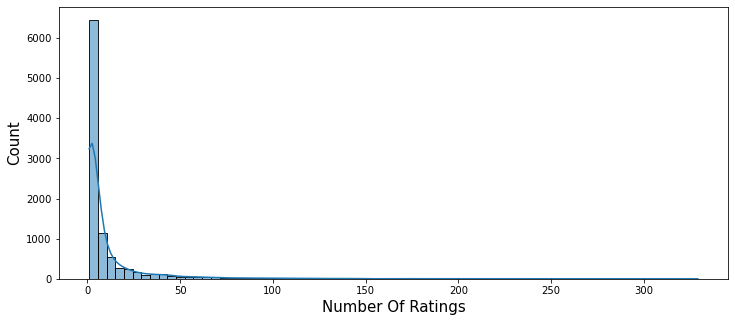

In [11]:
plt.figure(figsize=(12, 5))

sns.histplot(x = ratings["no_of_ratings"], kde=True, bins=70)
plt.xlabel("Number Of Ratings", fontsize=15)
plt.ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

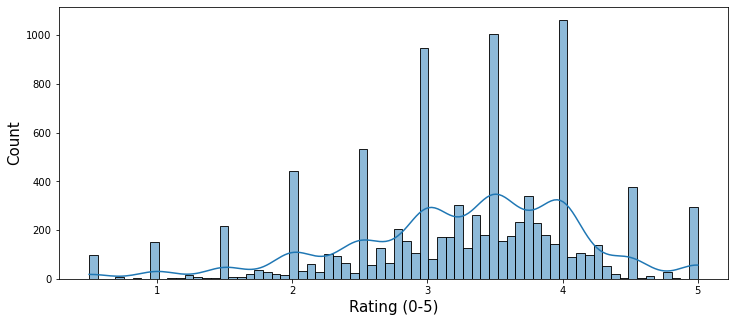

In [12]:
plt.figure(figsize=(12, 5))

sns.histplot(x = ratings["rating"], kde=True, bins=70)
plt.xlabel("Rating (0-5)", fontsize=15)
plt.ylabel("Count", fontsize=15)

## Joint Plot

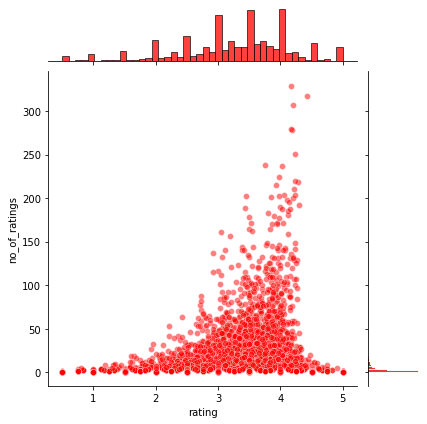

In [13]:
sns.jointplot(x = ratings["rating"], y = ratings["no_of_ratings"], alpha=0.5, color="red")

## Recommendation
We have 2 DataFrames - 
1. **merged_df** - Containing all the movie names and user ratings
2. **ratings**   - Containing title, average rating, and total number of ratings given   

Let's create a sparse matrix with movie names and the user ratings.

In [14]:
movies_matrix = merged_df.pivot_table(values="rating", index="userId", columns="title")

movies_matrix.shape

(610, 9719)

In [15]:
movies_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inference - 
There are a total of 610 unique users, and a total of 9719 movies. Now, let's find out the best recommendation after a particular movie that user watches.

But first, we look at the top 10 movies with highest number of ratings from the user.

In [16]:
ratings.sort_values(by=["no_of_ratings"], ascending=False).head(10)

,rating,no_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [17]:
ratings["no_of_ratings"].agg(["min", "max"])

min      1
max    329
Name: no_of_ratings, dtype: int64

In [18]:
def get_recommendation(movies_sparse_matrix, ratings_df, movie_name, no_of_recommendations=10):
    
    """A function to get recommendations on movie based on user ratings
    
    Agruments:
        movies_sparse_matrix - A sparse matrix with movie names and the 
                               user ratings (pivot table)
        ratings_df - DataFrame containing title (movie name), average rating, 
                     and total number of ratings for that movie
        movie_name - Movie name for recommendation
        no_of_recommendations - Number of movies to be recommended
    
    Returns:
        recommendations - A pandas DataFrame containing correlated movies, 
                          total ratings by user, and average rating of the movie
    """
    
    user_ratings = movies_sparse_matrix[movie_name]
    corr_with_movies = movies_sparse_matrix.corrwith(user_ratings)
    
    corr_df = pd.DataFrame(corr_with_movies, columns=["Correlation"])
    corr_df.dropna(inplace=True)
    
    corr_df = corr_df.join(ratings["no_of_ratings"])
    corr_df = corr_df.join(ratings["rating"])
    # A movie should have minimum of 80 ratings to be recommended
    # Otherwise, a movie with only 1 rating of 5.0 can also be highly correlated with movie_name
    
    corr_df = corr_df[(corr_df["no_of_ratings"] > 80)]
    recommendations = corr_df.sort_values(by = ["Correlation"], ascending=False).head(no_of_recommendations)
    
    return recommendations

In [19]:
get_recommendation(movies_matrix, ratings_df, "Shawshank Redemption, The (1994)", 10)

,Correlation,no_of_ratings,rating
title,,,
"Shawshank Redemption, The (1994)",1.000000,317,4.429022
Rear Window (1954),0.545149,84,4.261905
Four Weddings and a Funeral (1994),0.446212,103,3.519417
Shakespeare in Love (1998),0.426842,92,3.777174
Big (1988),0.416567,91,3.719780
Schindler's List (1993),0.402202,220,4.225000
Back to the Future Part II (1989),0.401188,87,3.505747
"Bourne Ultimatum, The (2007)",0.396477,81,3.697531
"Usual Suspects, The (1995)",0.394294,204,4.237745


In [20]:
get_recommendation(movies_matrix, ratings_df, "Avatar (2009)", 10)

,Correlation,no_of_ratings,rating
title,,,
Avatar (2009),1.000000,97,3.603093
Psycho (1960),0.654002,83,4.036145
Trainspotting (1996),0.623735,102,4.039216
Sin City (2005),0.620187,84,3.857143
Happy Gilmore (1996),0.596945,99,3.439394
Meet the Parents (2000),0.585892,91,3.417582
Star Wars: Episode II - Attack of the Clones (2002),0.577353,92,3.157609
"Monsters, Inc. (2001)",0.541616,132,3.871212
"Net, The (1995)",0.530552,112,3.040179


In [21]:
get_recommendation(movies_matrix, ratings_df, "Harry Potter and the Prisoner of Azkaban (2004)", 10)

,Correlation,no_of_ratings,rating
title,,,
Harry Potter and the Prisoner of Azkaban (2004),1.000000,93,3.913978
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.732810,107,3.761682
Harry Potter and the Chamber of Secrets (2002),0.662563,102,3.598039
Jerry Maguire (1996),0.617265,85,3.594118
"Princess Bride, The (1987)",0.516114,142,4.232394
Spider-Man (2002),0.460644,122,3.540984
Avatar (2009),0.458911,97,3.603093
There's Something About Mary (1998),0.457962,105,3.676190
Batman (1989),0.444918,189,3.428571


In [22]:
get_recommendation(movies_matrix, ratings_df, "Iron Man (2008)", 10)

,Correlation,no_of_ratings,rating
title,,,
Iron Man (2008),1.000000,94,3.824468
X-Men (2000),0.583925,133,3.699248
"Bourne Ultimatum, The (2007)",0.560186,81,3.697531
Meet the Parents (2000),0.543408,91,3.417582
Spider-Man (2002),0.495850,122,3.540984
Batman Begins (2005),0.490347,116,3.862069
"Matrix Reloaded, The (2003)",0.486403,96,3.354167
Up (2009),0.484231,105,4.004762
"Monsters, Inc. (2001)",0.456854,132,3.871212
